<center><h1 style="background-color: #C6F3CD; border-radius: 10px; color: #FFFFFF; padding: 5px;">
Van Westendorp's Price Sensitivity Meter (PSM)
</h1><center/>

**Link to the article** : https://medium.com/@soulawalid/van-westendorps-price-sensitivity-meter-psm-0b657d6862b7?sk=9c324720ded94b670171ef0749105ef0

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Define the data
data = {
    'Price (€)': [17, 18, 19, 20, 21, 22, 23, 24],
    'Too Expensive': [6, 13, 16, 28, 29, 46, 49, 38],
    'Too Cheap': [25, 40, 48, 41, 32, 20, 13, 6]
}

df = pd.DataFrame(data)
df

,Price (€),Too Expensive,Too Cheap
0,17,6,25
1,18,13,40
2,19,16,48
3,20,28,41
4,21,29,32
5,22,46,20
6,23,49,13
7,24,38,6


In [3]:
total_respondents = df['Too Expensive'].sum()  # Total respondents is 225

# Calculate percentage for each response
df['% Too Expensive'] = (df['Too Expensive'] / total_respondents) * 100
df['% Too Cheap'] = (df['Too Cheap'] / total_respondents) * 100

# Calculate cumulative percentages for "Too Expensive" (ascending price)
df['Cumulative Too Expensive'] = df['% Too Expensive'].cumsum()

# Initialize Cumulative Too Cheap with -100
df['Cumulative Too Cheap'] = -100.0  # Use float here

# Calculate the cumulative values for "Too Cheap"
for i in range(len(df)):
    if i > 0:  # Start calculating from the second row
        df.loc[i, 'Cumulative Too Cheap'] = df.loc[i - 1, 'Cumulative Too Cheap'] + df.loc[i - 1, '% Too Cheap']

# Display the dataframe
print("Cumulative Data:")
df

Cumulative Data:


,Price (€),Too Expensive,Too Cheap,% Too Expensive,% Too Cheap,Cumulative Too Expensive,Cumulative Too Cheap
0,17,6,25,2.666667,11.111111,2.666667,-100.000000
1,18,13,40,5.777778,17.777778,8.444444,-88.888889
2,19,16,48,7.111111,21.333333,15.555556,-71.111111
3,20,28,41,12.444444,18.222222,28.000000,-49.777778
4,21,29,32,12.888889,14.222222,40.888889,-31.555556
5,22,46,20,20.444444,8.888889,61.333333,-17.333333
6,23,49,13,21.777778,5.777778,83.111111,-8.444444
7,24,38,6,16.888889,2.666667,100.000000,-2.666667


In [4]:
# Calculate the difference between Cumulative Too Expensive and Cumulative Too Cheap
df['Difference'] = abs(df['Cumulative Too Cheap'] + (df['Cumulative Too Expensive']))

# Find the row with the minimum difference
opp_row = df.loc[df['Difference'].idxmin()]
optimal_price = opp_row['Price (€)']

print(f"\nOptimal Price Point (OPP) is approximately: {optimal_price}€")


Optimal Price Point (OPP) is approximately: 21.0€


In [5]:
df

,Price (€),Too Expensive,Too Cheap,% Too Expensive,% Too Cheap,Cumulative Too Expensive,Cumulative Too Cheap,Difference
0,17,6,25,2.666667,11.111111,2.666667,-100.000000,97.333333
1,18,13,40,5.777778,17.777778,8.444444,-88.888889,80.444444
2,19,16,48,7.111111,21.333333,15.555556,-71.111111,55.555556
3,20,28,41,12.444444,18.222222,28.000000,-49.777778,21.777778
4,21,29,32,12.888889,14.222222,40.888889,-31.555556,9.333333
5,22,46,20,20.444444,8.888889,61.333333,-17.333333,44.000000
6,23,49,13,21.777778,5.777778,83.111111,-8.444444,74.666667
7,24,38,6,16.888889,2.666667,100.000000,-2.666667,97.333333


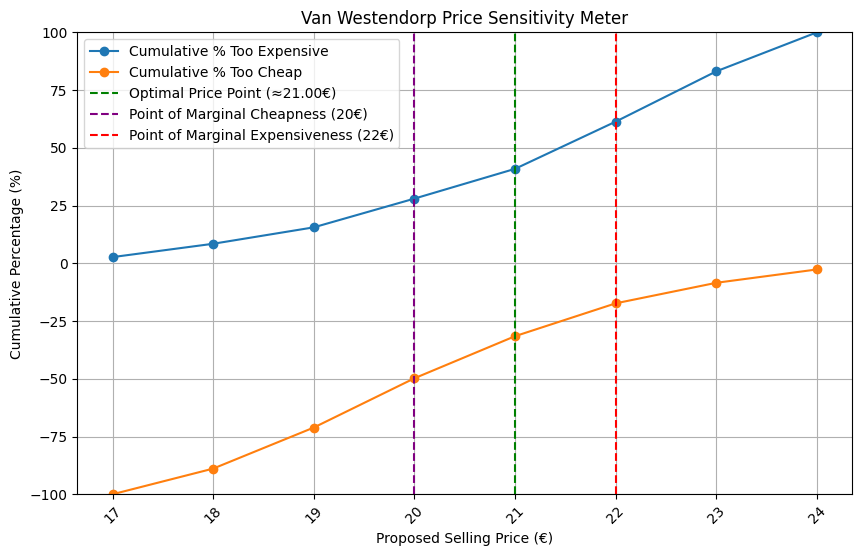

In [6]:
# Plot the cumulative curves
plt.figure(figsize=(10, 6))

# Plot Cumulative Too Expensive
plt.plot(df['Price (€)'], df['Cumulative Too Expensive'], label='Cumulative % Too Expensive', marker='o')

# Plot Cumulative Too Cheap
plt.plot(df['Price (€)'], df['Cumulative Too Cheap'], label='Cumulative % Too Cheap', marker='o')

# Plot OPP
plt.axvline(x=optimal_price, color='green', linestyle='--', label=f'Optimal Price Point (≈{optimal_price:.2f}€)')

# Point of Marginal Cheapness (PMC) at 20€
pmc_price = 20
plt.axvline(x=pmc_price, color='purple', linestyle='--', label='Point of Marginal Cheapness (20€)')

# Point of Marginal Expensiveness (PME) at 22€
pme_price = 22
plt.axvline(x=pme_price, color='red', linestyle='--', label='Point of Marginal Expensiveness (22€)')

# Titles and Labels
plt.title('Van Westendorp Price Sensitivity Meter')
plt.xlabel('Proposed Selling Price (€)')
plt.ylabel('Cumulative Percentage (%)')
plt.legend()
plt.grid(True)

# Ensure proper ticks and limits
plt.xticks(df['Price (€)'], rotation=45)
plt.ylim(-100, 100)

plt.show()

---

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the data
data = {
    'Price (€)': [1, 2, 3, 4, 5, 6, 7, 8],
    'Too Expensive': [51, 88, 14, 61, 50, 20, 72, 76],
    'Too Cheap': [74, 74, 87, 99, 23, 2, 21, 52]
}

df = pd.DataFrame(data)
df

total_respondents = df['Too Expensive'].sum()  # Total respondents is 225

# Calculate percentage for each response
df['% Too Expensive'] = (df['Too Expensive'] / total_respondents) * 100
df['% Too Cheap'] = (df['Too Cheap'] / total_respondents) * 100

# Calculate cumulative percentages for "Too Expensive" (ascending price)
df['Cumulative Too Expensive'] = df['% Too Expensive'].cumsum()

# Initialize Cumulative Too Cheap with -100
df['Cumulative Too Cheap'] = -100.0  # Use float here

# Calculate the cumulative values for "Too Cheap"
for i in range(len(df)):
    if i > 0:  # Start calculating from the second row
        df.loc[i, 'Cumulative Too Cheap'] = df.loc[i - 1, 'Cumulative Too Cheap'] + df.loc[i - 1, '% Too Cheap']

# Display the dataframe
print("Cumulative Data:")
df

# Calculate the difference between Cumulative Too Expensive and Cumulative Too Cheap
df['Difference'] = abs(df['Cumulative Too Cheap'] + (df['Cumulative Too Expensive']))

# Find the row with the minimum difference
opp_row = df.loc[df['Difference'].idxmin()]
optimal_price = opp_row['Price (€)']

print(f"\nOptimal Price Point (OPP) is approximately: {optimal_price}€")
df

Cumulative Data:

Optimal Price Point (OPP) is approximately: 4.0€


,Price (€),Too Expensive,Too Cheap,% Too Expensive,% Too Cheap,Cumulative Too Expensive,Cumulative Too Cheap,Difference
0,1,51,74,11.805556,17.129630,11.805556,-100.000000,88.194444
1,2,88,74,20.370370,17.129630,32.175926,-82.870370,50.694444
2,3,14,87,3.240741,20.138889,35.416667,-65.740741,30.324074
3,4,61,99,14.120370,22.916667,49.537037,-45.601852,3.935185
4,5,50,23,11.574074,5.324074,61.111111,-22.685185,38.425926
5,6,20,2,4.629630,0.462963,65.740741,-17.361111,48.379630
6,7,72,21,16.666667,4.861111,82.407407,-16.898148,65.509259
7,8,76,52,17.592593,12.037037,100.000000,-12.037037,87.962963
